In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS) 
####
import nltk
from nltk.corpus import stopwords

In [3]:
treino    = pd.read_csv('dataset_shuffle_train.csv')
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5038 non-null   int64  
 1   ID                       5038 non-null   int64  
 2   fake_news                5038 non-null   int64  
 3   text                     5038 non-null   object 
 4   author                   5038 non-null   object 
 5   average_word_length      5038 non-null   float64
 6   category                 5038 non-null   object 
 7   date_publication         5038 non-null   object 
 8   link                     5038 non-null   object 
 9   percent_speeling_errors  5038 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 393.7+ KB


In [6]:
validacao = pd.read_csv('dataset_shuffle_val.csv')
#validacao.info()
validacao.head()

,Unnamed: 0,ID,fake_news,text,author,average_word_length,category,date_publication,link,percent_speeling_errors
0,1080,1082,1,Temer joga pesado e sugere que Janot recebeu m...,None,4.84821,politica,28/06/2017,https://www.diariodobrasil.org/temer-joga-pesa...,0.000000
1,4680,1082,0,Janot diz que não há dúvidas de que Temer come...,"Por G1, Brasília",4.95553,politica,26/06/2017 11h50,https://g1.globo.com/politica/operacao-lava-ja...,0.001140
2,1079,1081,1,"Lula: ""Eles não dão destaque ao apartamento do...",None,4.20833,politica,28/06/2017,https://www.diariodobrasil.org/lula-eles-nao-d...,0.000000
3,4679,1081,0,"FHC diz que seria bom Lula disputar eleições, ...","Marianna Holanda, O Estado de S.Paulo",4.73333,politica,06 de fevereiro de 2018,"http://politica.estadao.com.br/noticias/geral,...",0.000000
4,1078,1080,1,Joesley não foi envenenado! Internação às pres...,None,5.14070,politica,30/06/2017,https://www.diariodobrasil.org/joesley-nao-foi...,0.005025


In [5]:
inteiro = pd.concat([treino, validacao])
inteiro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200 entries, 0 to 2161
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7200 non-null   int64  
 1   ID                       7200 non-null   int64  
 2   fake_news                7200 non-null   int64  
 3   text                     7200 non-null   object 
 4   author                   7200 non-null   object 
 5   average_word_length      7200 non-null   float64
 6   category                 7200 non-null   object 
 7   date_publication         7200 non-null   object 
 8   link                     7200 non-null   object 
 9   percent_speeling_errors  7200 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 618.8+ KB


In [7]:
print(treino['fake_news'].value_counts())
print(validacao['fake_news'].value_counts())
print(inteiro['fake_news'].value_counts())

1    2519
0    2519
Name: fake_news, dtype: int64
1    1081
0    1081
Name: fake_news, dtype: int64
1    3600
0    3600
Name: fake_news, dtype: int64


In [13]:
combinado = inteiro['text']
fake = inteiro[inteiro['fake_news']==1]['text']
real = inteiro[inteiro['fake_news']==0]['text']

In [14]:
print(sum(len(x) for x in combinado) / len(combinado))
print(sum(len(x) for x in fake) / len(fake))
print(sum(len(x) for x in real) / len(real))

3894.446388888889
1117.8772222222221
6671.015555555556


In [15]:
print(sum(len(x.split()) for x in combinado) / len(combinado))
print(sum(len(x.split()) for x in fake) / len(fake))
print(sum(len(x.split()) for x in real) / len(real))

643.0905555555555
185.88722222222222
1100.293888888889


In [17]:
def concatena_todas_sentencas(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [19]:
all_tokens = concatena_todas_sentencas(combinado)
fake_tokens = concatena_todas_sentencas(fake)   
real_tokens = concatena_todas_sentencas(real)

In [20]:
stop_por = set(stopwords.words("portuguese"))
palavras_parada = list(stop_por)

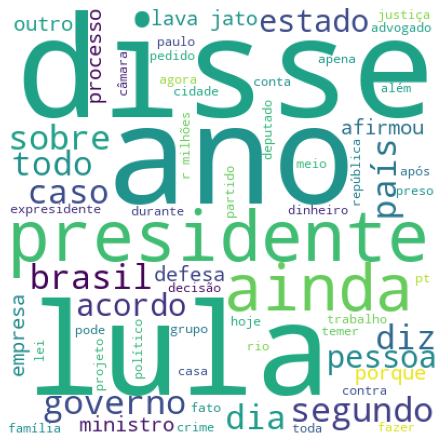

In [25]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(all_tokens) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

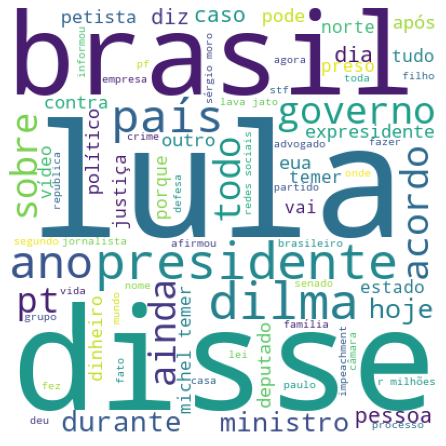

In [23]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(fake_tokens) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

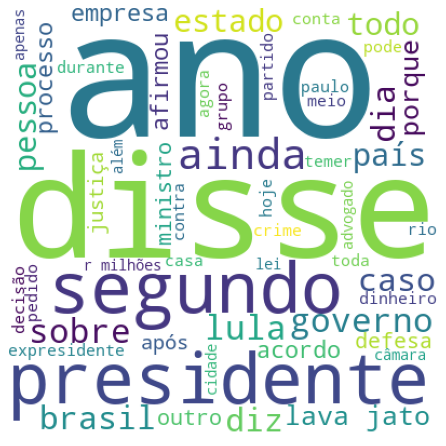

In [24]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = palavras_parada, 
            min_font_size = 10).generate(real_tokens) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [26]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

205965
65683
182959
42677


In [30]:
stoplist = set(stopwords.words("portuguese"))
all_tokens_words = [w for w in all_tokens.split() if w not in stoplist]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stoplist]
real_tokens_words = [w for w in real_tokens.split() if w not in stoplist]

In [29]:
Counter(all_tokens_words).most_common(20)

[('presidente', 9459),
 ('sobre', 9379),
 ('disse', 8861),
 ('lula', 8498),
 ('ainda', 7438),
 ('segundo', 7135),
 ('r$', 7002),
 ('governo', 6531),
 ('federal', 6405),
 ('ter', 6337),
 ('.', 5866),
 ('contra', 5828),
 ('diz', 5584),
 ('–', 5373),
 (',', 5350),
 ('anos', 5211),
 ('vai', 5185),
 ('pode', 5087),
 ('expresidente', 5043),
 ('após', 5016)]

In [31]:
Counter(fake_tokens_words).most_common(20)

[('lula', 2188),
 ('disse', 1864),
 ('presidente', 1640),
 ('[...]', 1628),
 ('dilma', 1376),
 (',', 1332),
 ('.', 1306),
 ('sobre', 1123),
 ('r$', 1106),
 ('\x96', 1053),
 ('governo', 1000),
 ('expresidente', 923),
 ('contra', 917),
 ('ainda', 906),
 ('acordo', 869),
 ('vai', 863),
 ('durante', 838),
 ('federal', 832),
 ('pode', 831),
 ('ministro', 799)]

In [32]:
Counter(real_tokens_words).most_common(20)

[('sobre', 8256),
 ('presidente', 7819),
 ('disse', 6997),
 ('segundo', 6689),
 ('ainda', 6532),
 ('lula', 6310),
 ('r$', 5896),
 ('federal', 5573),
 ('ter', 5560),
 ('governo', 5531),
 ('–', 5373),
 ('contra', 4911),
 ('diz', 4862),
 ('anos', 4603),
 ('.', 4560),
 ('vai', 4322),
 ('após', 4297),
 ('pode', 4256),
 ('expresidente', 4120),
 (',', 4018)]